<a href="https://colab.research.google.com/github/Surinder09/Tensorflow-specialization/blob/master/Horse_vs_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import zipfile

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip  

--2020-05-07 11:37:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   238MB/s    in 0.6s    

2020-05-07 11:37:11 (238 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-05-07 11:37:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2020-05-07 11:37:24 (80.6 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
file_name = '/tmp/horse-or-human.zip'
unzip = zipfile.ZipFile(file_name,'r')
unzip.extractall('/tmp/horse-or-human')
unzip.close()

file_name = '/tmp/validation-horse-or-human.zip'
unzip = zipfile.ZipFile(file_name,'r')
unzip.extractall('/tmp/validation-horse-or-human')
unzip.close()

In [0]:
# In image generator we need to specify the path of horses and human so that it automatically generates label
# path of horses need to be stored in variable 

train_horse =  os.path.join('/tmp/horse-or-human','horses')
train_human =  os.path.join('/tmp/horse-or-human','humans')

val_horse = os.path.join('/tmp/validation-horse-or-human','horses')
val_human = os.path.join('/tmp/validation-horse-or-human','humans')

In [6]:
print(len(os.listdir(train_horse))) # No of horses in train set
print(len(os.listdir(train_human))) # No of humans in train set

print(len(os.listdir(val_horse))) # No of horses in validation set
print(len(os.listdir(val_human))) # No of humans in validation set

500
527
128
128


In [0]:
#import matplotlib.image as mpimg
#image_path='/tmp/horse-or-human/horses/horse16-7.png'
#img = mpimg.imread(image_path)
#plt.imshow(img)

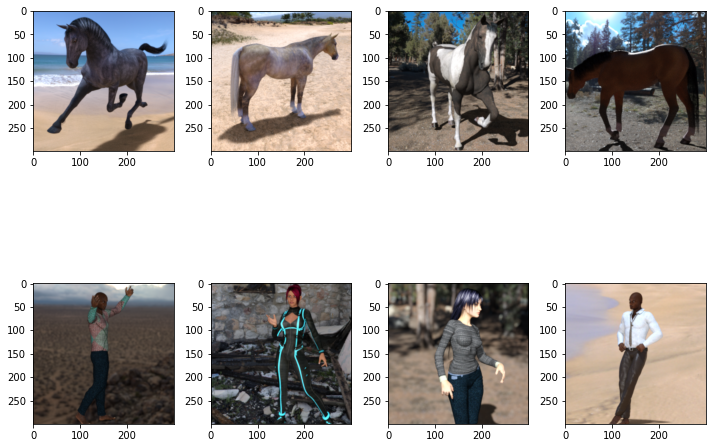

In [8]:
# Plot the image of random horses and humans in data
import matplotlib.image as mpimg
fig,ax = plt.subplots(2,4)
fig.set_size_inches(10,10)
no_image=4

# store the path of first 4 horse and human data
horse_data=[]
human_data=[]
for horse_name in os.listdir(train_horse)[:no_image]:
  horse_data.append((os.path.join(train_horse,horse_name)))

for human_name in os.listdir(train_human)[:no_image]:
  human_data.append((os.path.join(train_human,human_name)))

# plot the data
for i in range(4):
  horse_read = mpimg.imread(horse_data[i])
  human_read = mpimg.imread(human_data[i])
  ax[0,i].imshow(horse_read)
  ax[1,i].imshow(human_read)
  plt.grid(False)
  plt.tight_layout()


In [0]:
# Create the model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300, 300, 3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512,activation='relu'),
                             tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)])
                            

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       7

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
# Now we have image data. Our image not in constant shape, need to be rescaled and label th input data.
# This all can be done with tf.keras.ImageGenerator() module

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human',    # Path of directory where image is present
                                                    target_size = (300,300),  # Target size to feed to Neurl network
                                                    class_mode='binary',      # As we are doing binary classification
                                                    batch_size = 32          # Data will be loaded in batches
                                                    )

validation_generator = train_datagen.flow_from_directory('/tmp/validation-horse-or-human',
                                                         target_size =(300,300),
                                                         class_mode = 'binary',
                                                         batch_size = 8
                                                         )

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [13]:
# Fit the model on the train generator
history = model.fit_generator(train_generator,
                    steps_per_epoch = 8,
                    epochs = 16,
                    validation_data = validation_generator,
                    validation_steps = 8, 
                    verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/16
8/8 [==============================] - 2s 249ms/step - loss: 1.1623 - accuracy: 0.5352 - val_loss: 0.6413 - val_accuracy: 0.5000
Epoch 2/16
8/8 [==============================] - 2s 238ms/step - loss: 0.5496 - accuracy: 0.7852 - val_loss: 0.6250 - val_accuracy: 0.7812
Epoch 3/16
8/8 [==============================] - 2s 233ms/step - loss: 0.2397 - accuracy: 0.8906 - val_loss: 0.5202 - val_accuracy: 0.8906
Epoch 4/16
8/8 [==============================] - 2s 226ms/step - loss: 0.1522 - accuracy: 0.9258 - val_loss: 1.1987 - val_accuracy: 0.8281
Epoch 5/16
8/8 [==============================] - 2s 226ms/step - loss: 0.1524 - accuracy: 0.9471 - val_loss: 2.7309 - val_accuracy: 0.7500
Epoch 6/16
8/8 [==============================] - 2s 232ms/step - loss: 0.1403 - accuracy: 0.9648 - val_loss: 1.3159 - val_accuracy: 0.7656
Epoch 7/16
8/8 [==============================] - 2s 238ms/step - loss: 0.0639 - acc

In [28]:
# Make model predict the image
 from tensorflow.keras.preprocessing import image
 from google.colab import files
 import numpy as np

 file_name = files.upload() # Ask for input image 

 for fn in file_name.keys():
   path = os.path.join('/content/',fn)
   img_read = image.load_img(path,target_size=(300,300))
   x = image.img_to_array(img_read)
   x = np.expand_dims(x, axis=0)
   images = np.vstack([x])
   classes = model.predict(images, batch_size=10)

   prediction = model.predict(x)
   if prediction > 0.5:
     print(fn + " is horse")
   else:
     print(fn + 'is human')

Saving getProfileImage.jpg to getProfileImage.jpg
getProfileImage.jpgis human
